In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

1. PICKY EATER

In [2]:
Blueberries = 106
Toasts = 5
Yogurt = 50

In [3]:
N = Blueberries + Toasts + Yogurt

In [4]:
Pb = Blueberries/N
Pt = Toasts/N
Py = Yogurt/N

In [5]:
Multi_Dist_Prob = (np.math.factorial(N)/(np.math.factorial(Blueberries)*np.math.factorial(Toasts)*np.math.factorial(Yogurt)))*((Pb**Blueberries)*(Pt**Toasts)*(Py**Yogurt))

In [6]:
Multi_Dist_Prob

0.0121770190375912

In [7]:
Pb

0.6583850931677019

In [8]:
Pt

0.031055900621118012

In [9]:
Py

0.3105590062111801

In [10]:
Blueberries_p = 330/4
Toasts_p = 29/4
Yogurt_p = 50/4

In [11]:
priori_Blueberries = Blueberries + Blueberries_p
priori_Toasts = Toasts + Toasts_p
priori_Yogurt = Yogurt + Yogurt_p
priori_N = priori_Blueberries + priori_Toasts + priori_Yogurt

In [12]:
priori_Pb = priori_Blueberries/priori_N
priori_Pt = priori_Toasts/priori_N
priori_Py = priori_Yogurt/priori_N

In [13]:
priori_Pb

0.7160493827160493

In [14]:
priori_Pt

0.04653371320037987

In [15]:
priori_Py

0.23741690408357075

2. CENTRAL LIMIT THEOREM

In [17]:
import librosa

In [28]:
x1,sr = librosa.load("x1.wav",sr = None)

In [30]:
x2,sr = librosa.load("x2.wav",sr = None)

In [31]:
x1 = (x1 - x1.mean())/(x1.std())
x2 = (x2 - x2.mean())/(x2.std())

In [86]:
import math

In [46]:
N1 = x1.size
N2 = x2.size

In [54]:
kurt_x1 = 0
for x in x1:
    kurt_x1 = kurt_x1 + x**4
kurt_x1 = (kurt_x1/N1) - 3

In [55]:
kurt_x1

4.907141819774566

Kurtosis of signal s = 4.907141819774566

In [56]:
kurt_x2 = 0
for x in x2:
    kurt_x2 = kurt_x2 + x**4
kurt_x2 = (kurt_x2/N2) - 3

In [57]:
kurt_x2

3.8733284501879455

Kurtosis of signal s = 3.8733284501879455

Since a Gaussian distribution has a Kurtosis value of 3, the signal x1 has a kurtosis value indicative of a less Gaussian-like distribution as compared to signal x2 as it's Kurtosis value is farther from 3 than that of x1. Thererfore, according to the Central Limit Theorem (CLT), signal x2 has more sources as it is more Gaussian-like.

In [58]:
import seaborn as sns

In [59]:
x1,sr = librosa.load("x1.wav",sr = None)
x2,sr = librosa.load("x2.wav",sr = None)

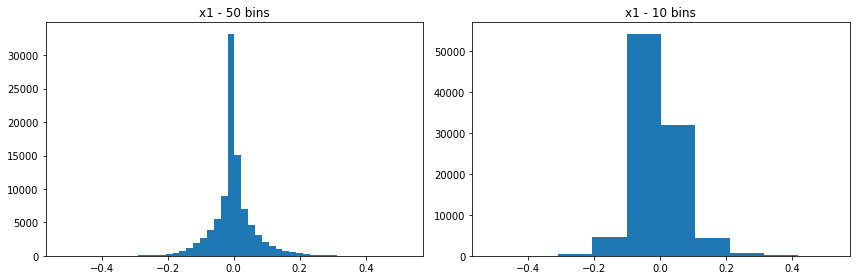

In [79]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize = (12,4))
axes[0].hist(x1,bins = 50)
axes[1].hist(x1)
axes[0].set_title('x1 - 50 bins')
axes[1].set_title('x1 - 10 bins')
plt.tight_layout()

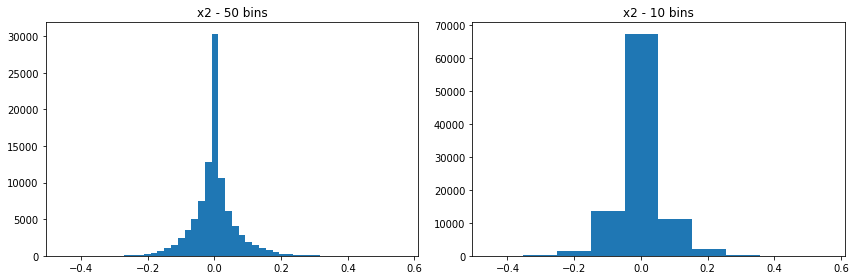

In [80]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize = (12,4))
axes[0].hist(x2,bins = 50)
axes[1].hist(x2)
axes[0].set_title('x2 - 50 bins')
axes[1].set_title('x2 - 10 bins')
plt.tight_layout()

We can clearly observe from the 10 bins histogram of the signals that the signal x2 is more Gaussian-like as it's mean is closer to 0.

In [83]:
s,sr = librosa.load("s.wav",sr = None)

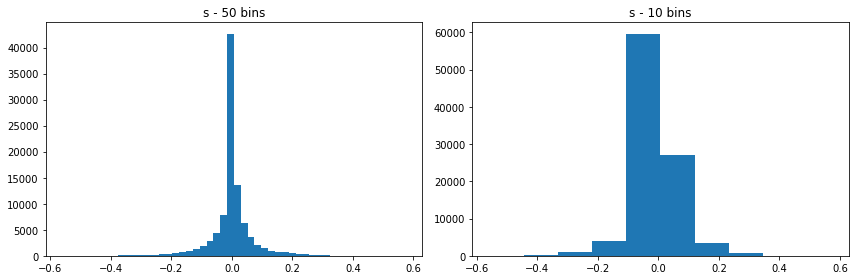

In [84]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize = (12,4))
axes[0].hist(s,bins = 50)
axes[1].hist(s)
axes[0].set_title('s - 50 bins')
axes[1].set_title('s - 10 bins')
plt.tight_layout()

We can easily tell from the graph of signal s that it is less Gaussian like than signal x2. It is close between signal s and signal x1 but we can still see that for signal x1, the sample mean is closer to 0.

In [67]:
s = (s - s.mean())/s.std()

In [68]:
Ns = s.size

In [69]:
kurt_s = 0
for x in s:
    kurt_s = kurt_s + x**4
kurt_s = (kurt_s/Ns) - 3

In [70]:
kurt_s

7.293442698210642

Kurtosis of signal s = 7.293442698210642

3. BFGS

In [276]:
train_inp = plt.imread('sgx_train.jpg')
train_tar = plt.imread('sg_train.jpg')
test = plt.imread('sgx_test.jpg')

In [277]:
train_inp = train_inp/255
train_tar = train_tar/255
test = test/255

In [278]:
f = np.random.rand(225)

In [279]:
X = np.random.rand(186*186,225)

In [280]:
k = 0
for i in range(186):
    for j in range(186):
        X1 = train_inp[i:i+15,j:j+15]
        X2 = np.array([])
        for z in range(15):
            X2 = np.concatenate((X2,X1[:,z]))
        X[k] = X2
        k = k + 1

In [281]:
X = X.T

In [282]:
N = 186*186

In [283]:
X.shape

(225, 34596)

In [284]:
train_inp.shape

(200, 200)

In [285]:
def G(T):
    T = T.reshape(34596,1)
    for i in range(34596):
        T[i] = 1/(1 + np.exp(-T[i]))
    T = T.reshape(1,34596)
    return T

In [286]:
def Gdash(T):
    T = T.reshape(34596,1)
    for i in range(34596):
        C = 1/(1 + np.exp(-T[i]))
        T[i] = C*(1 - C)
    T = T.reshape(1,34596)
    return T

In [287]:
ft = f.reshape(1,225)

In [288]:
(ft@X).shape

(1, 34596)

In [289]:
s = train_tar[7:193,7:193]

In [290]:
A = np.array([])
for i in range(186):
    A = np.concatenate((A,s[i]))
s = A

In [291]:
s.shape

(34596,)

In [292]:
st = s.reshape(1,34596)

In [293]:
st.shape

(1, 34596)

In [294]:
Change_in_f = (-2/N) * X @ (((st - G(ft@X)) * Gdash(ft@X)).reshape(34596,1))

In [295]:
Change_in_f.shape

(225, 1)

In [298]:
rho = 0.2

In [299]:
f.shape

(225,)

In [300]:
Change_in_f

array([[1.00288770e-07],
       [9.43835509e-08],
       [9.40588071e-08],
       [9.04319075e-08],
       [8.80813299e-08],
       [8.84901409e-08],
       [8.97932546e-08],
       [8.81254909e-08],
       [8.71703398e-08],
       [8.49144417e-08],
       [7.77386979e-08],
       [7.17652932e-08],
       [6.79072429e-08],
       [6.65948614e-08],
       [7.37852670e-08],
       [9.62654532e-08],
       [9.04236025e-08],
       [9.14478687e-08],
       [8.95379704e-08],
       [8.70800370e-08],
       [8.89949359e-08],
       [8.87335192e-08],
       [8.41571059e-08],
       [8.18738736e-08],
       [8.00713166e-08],
       [7.27512921e-08],
       [6.80687702e-08],
       [6.49225826e-08],
       [6.23898297e-08],
       [6.88927033e-08],
       [9.36748431e-08],
       [8.77166059e-08],
       [9.01268488e-08],
       [8.94110915e-08],
       [8.80310349e-08],
       [8.83974769e-08],
       [8.75703591e-08],
       [8.39858980e-08],
       [8.05390369e-08],
       [7.66561680e-08],


In [301]:
f = ft.T

In [302]:
f.shape

(225, 1)

In [303]:
error = np.random.rand(1000)

In [304]:
error[0]

0.08887889292321938

In [305]:
for i in range(0,500):
    error[i] = (1/N) * ((st - G(ft@X))@(st - G(ft@X)).T)
    f = f - (rho * Change_in_f)
    Change_in_f = (-2/N) * X @ (((st - G(ft@X)) * Gdash(ft@X)).reshape(34596,1))
    ft = f.T

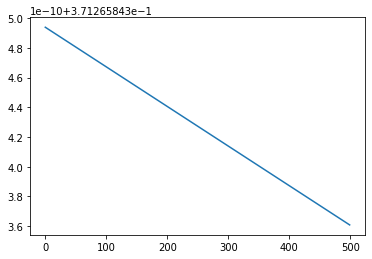

In [306]:
plt.plot(error[0:500])

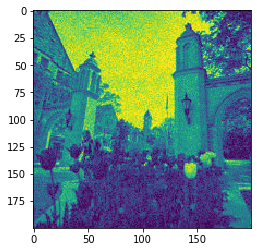

In [307]:
plt.imshow(train_inp)

In [308]:
f = f.reshape(1,225)

In [309]:
filtered_inp = f@X

In [310]:
filtered_inp = filtered_inp.reshape(186,186)

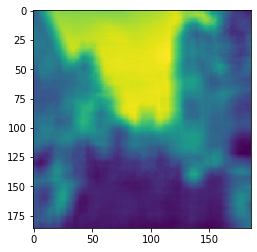

In [311]:
plt.imshow(filtered_inp)

In [312]:
filtered_tar = np.random.rand(186*186,225)

In [313]:
k = 0
for i in range(186):
    for j in range(186):
        X1 = train_tar[i:i+15,j:j+15]
        X2 = np.array([])
        for z in range(15):
            X2 = np.concatenate((X2,X1[:,z]))
        filtered_tar[k] = X2
        k = k + 1

In [314]:
filtered_tar = f@(filtered_tar.T)

In [315]:
filtered_tar.shape

(1, 34596)

In [316]:
filtered_tar = filtered_tar.reshape(186,186)

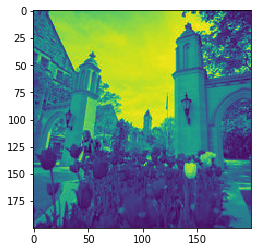

In [317]:
plt.imshow(train_tar)

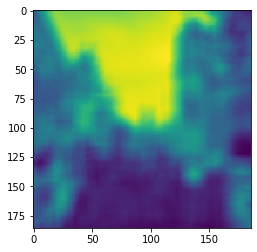

In [319]:
plt.imshow(filtered_tar)

In [320]:
filtered_test = np.random.rand(186*186,225)

In [321]:
k = 0
for i in range(186):
    for j in range(186):
        X1 = test[i:i+15,j:j+15]
        X2 = np.array([])
        for z in range(15):
            X2 = np.concatenate((X2,X1[:,z]))
        filtered_test[k] = X2
        k = k + 1

In [322]:
filtered_test = f@(filtered_test.T)
filtered_test = filtered_test.reshape(186,186)

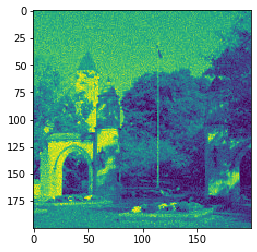

In [325]:
plt.imshow(test)

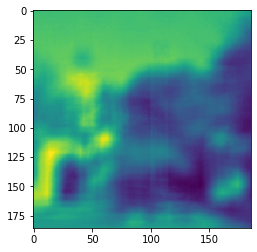

In [324]:
plt.imshow(filtered_test)

In [227]:
G1 = np.identity(225)

In [228]:
G1 = 0.1*G1

In [229]:
f_bfgs = np.random.rand(225)

In [230]:
X_bfgs = np.random.rand(186*186,225)

In [231]:
k = 0
for i in range(186):
    for j in range(186):
        X1 = train_inp[i:i+15,j:j+15]
        X2 = np.array([])
        for z in range(15):
            X2 = np.concatenate((X2,X1[:,z]))
        X_bfgs[k] = X2
        k = k + 1

In [232]:
X_bfgs = X_bfgs.T

In [233]:
ft_bfgs = f_bfgs.reshape(1,225)

In [234]:
Change_in_f_bfgs = (-2/N) * X_bfgs @ (((st - G(ft_bfgs@X_bfgs)) * Gdash(ft_bfgs@X_bfgs)).reshape(34596,1))

In [235]:
f_bfgs = f_bfgs.reshape(225,1)

In [236]:
f_bfgs_new = f_bfgs - (G1@Change_in_f_bfgs)

In [237]:
p = f_bfgs_new - f_bfgs

In [238]:
p.shape

(225, 1)

In [239]:
ft_bfgs_new = f_bfgs_new.T

In [240]:
ft_bfgs_new.shape

(1, 225)

In [241]:
X_bfgs.shape

(225, 34596)

In [242]:
Change_in_f_bfgs_new = (-2/N) * X_bfgs @ (((st - G(ft_bfgs_new@X_bfgs)) * Gdash(ft_bfgs_new@X_bfgs)).reshape(34596,1))

In [243]:
v = Change_in_f_bfgs_new - Change_in_f_bfgs

In [244]:
v.shape

(225, 1)

In [245]:
p.shape

(225, 1)

In [246]:
G1.shape

(225, 225)

In [247]:
u = (p/(p.T@v)) - ((G1@v)/((v.T@G1)@v))

In [248]:
error_bfgs = np.random.rand(1000)

In [249]:
error_bfgs[0] = (1/N) * ((st - G(ft_bfgs@X_bfgs))@(st - G(ft_bfgs@X_bfgs)).T)

In [250]:
f_bfgs_new.shape

(225, 1)

In [251]:
for i in range(0,40):
    error_bfgs[i] = (1/N) * ((st - G(ft_bfgs_new@X_bfgs))@(st - G(ft_bfgs_new@X_bfgs)).T)
    temp = G1
    G1 = temp + (p@p.T)/(p.T@v) - ((((G1@v)@v.T)@G1)/((v.T@G1)@v)) + (((v.T@G1)@v)*(u@u.T))
    f_bfgs = f_bfgs_new
    Change_in_f_bfgs = Change_in_f_bfgs_new
    f_bfgs_new = f_bfgs_new - (G1 @ Change_in_f_bfgs_new)
    ft_bfgs_new = f_bfgs_new.T
    Change_in_f_bfgs_new = (-2/N) * X_bfgs @ (((st - G(ft_bfgs_new@X_bfgs)) * Gdash(ft_bfgs_new@X_bfgs)).reshape(34596,1))
    p = f_bfgs_new - f_bfgs
    v = Change_in_f_bfgs_new - Change_in_f_bfgs
    u = (p/(p.T@v)) - ((G1@v)/((v.T@G1)@v))

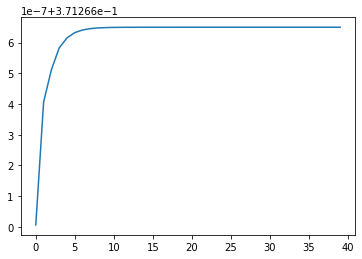

In [252]:
plt.plot(error_bfgs[0:40])

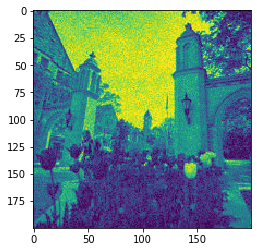

In [253]:
plt.imshow(train_inp)

In [254]:
f_bfgs = f_bfgs.reshape(1,225)

In [255]:
denoised_inp = f_bfgs@X_bfgs

In [256]:
denoised_inp = denoised_inp.reshape(186,186)

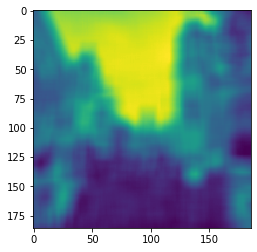

In [257]:
plt.imshow(denoised_inp)

In [260]:
denoised_tar = f_bfgs@(filtered_tar.T)

In [261]:
denoised_tar = denoised_tar.reshape(186,186)

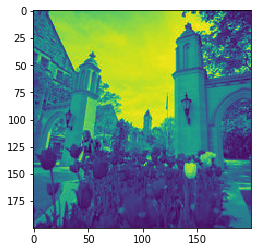

In [263]:
plt.imshow(train_tar)

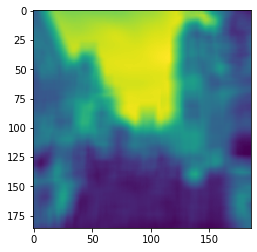

In [262]:
plt.imshow(denoised_tar)

In [264]:
filtered_test = np.random.rand(186*186,225)

In [265]:
k = 0
for i in range(186):
    for j in range(186):
        X1 = test[i:i+15,j:j+15]
        X2 = np.array([])
        for z in range(15):
            X2 = np.concatenate((X2,X1[:,z]))
        filtered_test[k] = X2
        k = k + 1

In [267]:
denoised_test = f_bfgs@((filtered_test).T)

In [268]:
denoised_test = denoised_test.reshape(186,186)

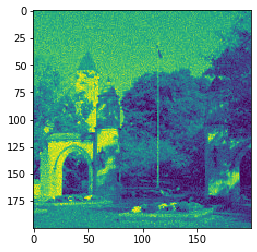

In [270]:
plt.imshow(test)

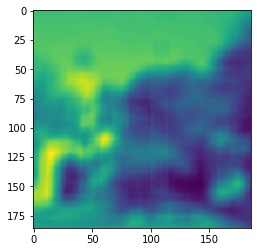

In [269]:
plt.imshow(denoised_test)

4. WHITE NOISE

In [2]:
import librosa

In [407]:
x,sr = librosa.load("x.wav",sr = None)

In [408]:
x

array([-0.01013184, -0.04428101, -0.08309937, ..., -0.00976562,
        0.02929688,  0.07608032], dtype=float32)

In [409]:
x.size

96245

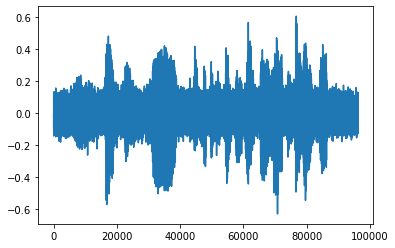

In [410]:
plt.plot(x)

In [411]:
N = 1024

In [412]:
w = np.exp(-1J*2*np.pi/N)

In [413]:
J,K = np.meshgrid(np.arange(N),np.arange(N))
F = np.power(w,J*K)
Fr = np.real(F)

In [414]:
Fr

array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 0.99998118, 0.9999247 , ..., 0.99983058, 0.9999247 ,
        0.99998118],
       [1.        , 0.9999247 , 0.99969882, ..., 0.99932238, 0.99969882,
        0.9999247 ],
       ...,
       [1.        , 0.99983058, 0.99932238, ..., 0.99847558, 0.99932238,
        0.99983058],
       [1.        , 0.9999247 , 0.99969882, ..., 0.99932238, 0.99969882,
        0.9999247 ],
       [1.        , 0.99998118, 0.9999247 , ..., 0.99983058, 0.9999247 ,
        0.99998118]])

In [415]:
F

array([[1.        +0.j        , 1.        +0.j        ,
        1.        +0.j        , ..., 1.        +0.j        ,
        1.        +0.j        , 1.        +0.j        ],
       [1.        +0.j        , 0.99998118-0.00613588j,
        0.9999247 -0.01227154j, ..., 0.99983058+0.01840673j,
        0.9999247 +0.01227154j, 0.99998118+0.00613588j],
       [1.        +0.j        , 0.9999247 -0.01227154j,
        0.99969882-0.02454123j, ..., 0.99932238+0.03680722j,
        0.99969882+0.02454123j, 0.9999247 +0.01227154j],
       ...,
       [1.        +0.j        , 0.99983058+0.01840673j,
        0.99932238+0.03680722j, ..., 0.99847558-0.05519524j,
        0.99932238-0.03680722j, 0.99983058-0.01840673j],
       [1.        +0.j        , 0.9999247 +0.01227154j,
        0.99969882+0.02454123j, ..., 0.99932238-0.03680722j,
        0.99969882-0.02454123j, 0.9999247 -0.01227154j],
       [1.        +0.j        , 0.99998118+0.00613588j,
        0.9999247 +0.01227154j, ..., 0.99983058-0.01840673j,
 

In [416]:
import scipy as sc

In [417]:
hann_w = sc.signal.get_window('hann',N)

In [418]:
F.shape

(1024, 1024)

In [419]:
X = np.random.rand(1024,186)

In [420]:
for i in range(186):
    X[:,i] = x[i*512:(i*512)+N]*hann_w

In [421]:
Fr = np.real(F)

In [422]:
Fi = np.imag(F)

In [423]:
Y_abs = np.abs(F@X)

In [424]:
Y_abs.shape

(1024, 186)

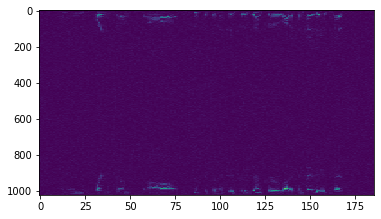

In [425]:
plt.imshow(Y_abs,aspect = 0.1)

In [426]:
Y = F@X

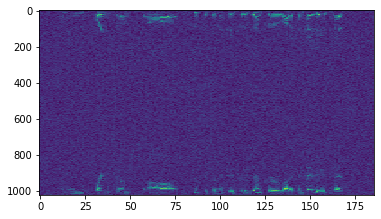

In [427]:
Y_05 = Y_abs**(0.5)
plt.imshow(Y_05,aspect = 0.1)

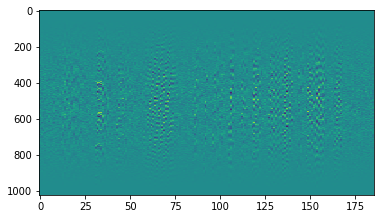

In [428]:
plt.imshow(X,aspect = 0.1)

In [471]:
N_noise = 30
c_noise = np.zeros(186)

In [472]:
for i in range(15):
    c_noise = c_noise + Y_abs[i,:]

In [473]:
for i in range(1008,1024):
    c_noise = c_noise + Y_abs[i,:]

In [474]:
c_noise

array([3.94386068e+00, 4.27737140e+00, 1.97234104e+00, 7.67998717e+00,
       7.44541011e+00, 9.78835787e+00, 9.12905313e+00, 9.17260461e+00,
       4.19452264e+00, 4.39479904e+00, 6.99580705e+00, 3.32953795e+00,
       4.60329030e+00, 4.96896850e+01, 9.17929812e+01, 4.94345807e+01,
       3.58485416e+01, 4.16880830e+01, 6.65727723e+01, 6.17938854e+01,
       5.60019418e+01, 4.95894056e+01, 4.43636009e+01, 4.08358291e+01,
       3.01179736e+01, 1.04513997e+01, 9.63677697e+00, 8.09001955e+00,
       5.26337062e+00, 4.67642245e+00, 7.21907037e+00, 0.00000000e+00,
       4.75723946e-01, 6.58144533e+00, 2.40264603e+01, 4.43944118e+01,
       4.08584418e+01, 6.33222298e+01, 5.13362503e+01, 1.91427456e+01,
       8.28004354e+00, 4.65016302e+00, 5.77327675e+00, 1.51065867e-01,
       4.27928141e+00, 1.37246488e+01, 2.03893981e+01, 3.38492284e+01,
       3.80926400e+01, 4.28464786e+01, 1.15115134e+01, 5.79346528e+00,
       5.54088714e+00, 8.99278523e+00, 5.27634705e+00, 1.30693661e+01,
      

In [475]:
Y

array([[ 1.10020558+0.j        , -0.6409451 +0.j        ,
        -0.69992789+0.j        , ..., -1.74400848+0.j        ,
         0.37596339+0.j        ,  0.45500826+0.j        ],
       [-0.73505158+0.43415668j,  1.0225327 -0.86415292j,
         0.52107507-0.53239447j, ...,  1.20012647+0.14185462j,
        -0.47443298+0.93499845j,  0.40357772+0.11510335j],
       [-0.19227677+0.31763182j, -0.95161207+0.58846556j,
        -0.30797629+1.07566091j, ..., -0.92818131-0.60418174j,
         0.90807031-0.87686007j, -0.64552028+0.38994236j],
       ...,
       [ 0.25339815+0.43682284j, -0.06115183-0.18272118j,
         0.26908885+0.53432537j, ...,  1.0906823 -0.29762566j,
        -1.0650468 -0.05779707j,  0.2987586 -0.01607839j],
       [-0.19227677-0.31763182j, -0.95161207-0.58846556j,
        -0.30797629-1.07566091j, ..., -0.92818131+0.60418174j,
         0.90807031+0.87686007j, -0.64552028-0.38994236j],
       [-0.73505158-0.43415668j,  1.0225327 +0.86415292j,
         0.52107507+0.53239447

In [476]:
M = np.abs(c_noise)/N_noise

In [477]:
M

array([1.31462023e-01, 1.42579047e-01, 6.57447014e-02, 2.55999572e-01,
       2.48180337e-01, 3.26278596e-01, 3.04301771e-01, 3.05753487e-01,
       1.39817421e-01, 1.46493301e-01, 2.33193568e-01, 1.10984598e-01,
       1.53443010e-01, 1.65632283e+00, 3.05976604e+00, 1.64781936e+00,
       1.19495139e+00, 1.38960277e+00, 2.21909241e+00, 2.05979618e+00,
       1.86673139e+00, 1.65298019e+00, 1.47878670e+00, 1.36119430e+00,
       1.00393245e+00, 3.48379991e-01, 3.21225899e-01, 2.69667318e-01,
       1.75445687e-01, 1.55880748e-01, 2.40635679e-01, 0.00000000e+00,
       1.58574649e-02, 2.19381511e-01, 8.00882011e-01, 1.47981373e+00,
       1.36194806e+00, 2.11074099e+00, 1.71120834e+00, 6.38091519e-01,
       2.76001451e-01, 1.55005434e-01, 1.92442558e-01, 5.03552889e-03,
       1.42642714e-01, 4.57488295e-01, 6.79646605e-01, 1.12830761e+00,
       1.26975467e+00, 1.42821595e+00, 3.83717115e-01, 1.93115509e-01,
       1.84696238e-01, 2.99759508e-01, 1.75878235e-01, 4.35645537e-01,
      

In [478]:
for i in range(1024):
    Y_abs[i,:] = Y_abs[i,:] - M
    for j in range(186):
        if Y_abs[i,j] < 0:
            Y_abs[i,j] = 0

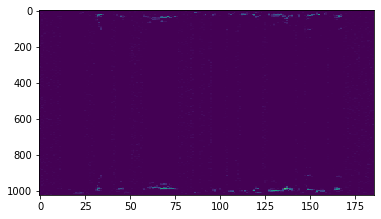

In [479]:
plt.imshow(Y_abs,aspect = 0.1)

In [480]:
Y1 = np.abs(F@X)

In [481]:
Y_cleaned = Y/Y1

In [482]:
Y_cleaned = Y_cleaned*Y_abs

In [483]:
Y_cleaned

array([[ 0.12360706+0.j        , -0.        +0.j        ,
        -0.        +0.j        , ..., -0.77171097+0.j        ,
         0.        +0.j        ,  0.        +0.j        ],
       [-0.        +0.j        ,  0.34187376-0.28892104j,
         0.        +0.j        , ...,  0.23455068+0.02772383j,
        -0.        +0.j        ,  0.        +0.j        ],
       [-0.        +0.j        , -0.19365557+0.11975429j,
        -0.08032467+0.28054791j, ..., -0.1133114 -0.07375787j,
         0.08372653-0.08084886j, -0.        +0.j        ],
       ...,
       [ 0.        +0.j        ,  0.        -0.j        ,
         0.        +0.j        , ...,  0.15268127-0.0416637j ,
         0.        -0.j        ,  0.        +0.j        ],
       [ 0.        -0.j        , -0.19365557-0.11975429j,
        -0.08032467-0.28054791j, ..., -0.1133114 +0.07375787j,
         0.08372653+0.08084886j,  0.        -0.j        ],
       [ 0.        -0.j        ,  0.34187376+0.28892104j,
         0.        +0.j       

Couldnt get correct inverse using the code below

In [ ]:
w1 = np.exp(1J*2*np.pi/N)/N
J1,K1 = np.meshgrid(np.arange(N),np.arange(N))
F_inv2 = np.power(w1,J1*K1)

In [484]:
F_inv = np.linalg.inv(F)

In [485]:
Y_cleaned.shape

(1024, 186)

In [486]:
X_cap = F_inv@Y_cleaned

In [487]:
X_cap.shape

(1024, 186)

In [488]:
X_cap = X_cap.T

In [489]:
X_cap.shape

(186, 1024)

In [490]:
final = np.zeros(95744)

In [491]:
X_cap = np.real(X_cap)

In [492]:
final[0:512] = X_cap[0,0:512]

In [493]:
k = 512

In [494]:
for i in range(185):
    final[k:(k+512)] = X_cap[i,512:1024] + X_cap[(i+1),0:512]
    k = k + 512

In [495]:
X_cap.shape

(186, 1024)

In [496]:
final.shape

(95744,)

In [497]:
final[95232:] = X_cap[185,512:1024]

In [498]:
final

array([-0.00156501, -0.00213994,  0.00067669, ...,  0.00038397,
       -0.00642276, -0.00109049])

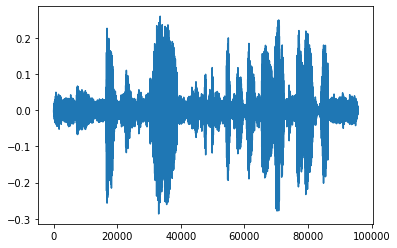

In [499]:
plt.plot(final)

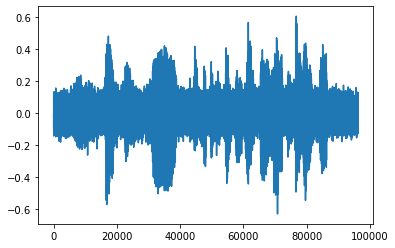

In [500]:
plt.plot(x)

In [501]:
import IPython.display as ipd

In [502]:
ipd.Audio(final, rate=sr)

5. STEREO MATCHING

In [504]:
import matplotlib.image as mpimg

In [507]:
img_l = mpimg.imread('im0.ppm')

In [509]:
img_r = mpimg.imread('im8.ppm')

In [613]:
img_r.shape

(381, 430, 3)

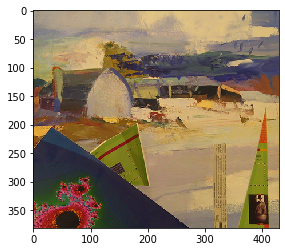

In [615]:
plt.imshow(img_l)

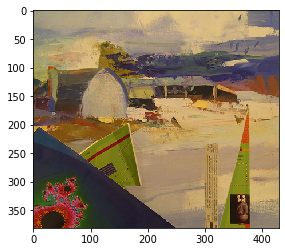

In [616]:
plt.imshow(img_r)

In [526]:
D = np.random.rand(381,390)

In [548]:
a = np.array(img_l[0,1])
a

array([156, 149, 134], dtype=uint8)

In [547]:
b = np.array(img_r[0,1])
b

array([158, 151, 126], dtype=uint8)

array([254, 254,   8], dtype=uint8)

In [557]:
ld = 0
ld1 = 0
lid = 0

In [560]:
for i in range(381):
    for j in range(390):
        for k in range(40):
            for l in range(3):
                if img_r[i,j,l] > img_l[i,j+k,l]:
                    ld1 = ld1 + (img_r[i,j,l] - img_l[i,j+k,l])**2
                else:
                    ld1 = ld1 + (img_l[i,j+k,l] - img_r[i,j,l])**2
            ld1 = np.sqrt(ld1)
            if k == 0:
                ld = ld1
                lid = 0
            else:
                if ld1 < ld:
                    ld = ld1
                    lid = k
            ld1 = 0
        D[i,j] = lid

In [561]:
D

array([[ 2.,  7.,  0., ...,  1., 12.,  7.],
       [ 9.,  4.,  3., ..., 25.,  5., 10.],
       [ 3.,  8.,  7., ..., 30., 29., 10.],
       ...,
       [16., 27., 13., ..., 37., 39., 26.],
       [31., 35., 18., ..., 33., 31., 33.],
       [26., 25., 24., ..., 27., 32., 33.]])

In [562]:
img_r[0,2]

array([145, 146, 119], dtype=uint8)

In [565]:
img_l[0,0]

array([153, 148, 139], dtype=uint8)

In [704]:
D[0]

array([ 2.,  7.,  0.,  2.,  4.,  3.,  2.,  1., 14., 10.,  9., 11., 10.,
        6.,  8., 14., 28., 27., 27., 11., 24., 23., 22., 22.,  5.,  4.,
       19., 18.,  2.,  0., 15., 14., 13., 12., 11.,  9.,  8.,  7.,  5.,
        6., 36.,  5.,  2.,  1.,  2.,  1.,  7.,  6.,  5., 23.,  3.,  2.,
        1., 30., 29.,  7.,  6., 26., 25., 24.,  2., 15., 14., 13.,  2.,
       18.,  6.,  9.,  8.,  3.,  6.,  5.,  4.,  4.,  2.,  1.,  6.,  0.,
       10.,  8.,  7., 35.,  0.,  4.,  4., 37.,  9., 29.,  6.,  8., 37.,
       25.,  3.,  5.,  5., 21., 28., 29., 15., 16., 26., 15., 14., 13.,
       12., 11., 10., 20., 37.,  6.,  6., 30.,  4.,  3.,  8., 17., 11.,
       22., 36., 39.,  6.,  6., 11.,  4., 34., 13.,  6.,  0., 18., 20.,
       15., 27., 39., 26., 38., 32., 35.,  8.,  7.,  7.,  5., 29., 21.,
       24., 10., 29.,  8., 27., 26., 25., 23., 24.,  5.,  4., 20., 20.,
       14., 13.,  0., 12., 13.,  9.,  0., 12.,  6.,  6.,  5.,  7.,  5.,
        4.,  4.,  6.,  6., 14., 13., 12., 11., 17., 14., 39.,  7

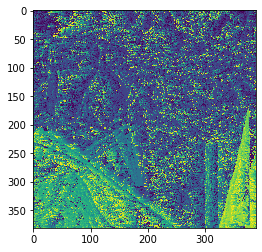

In [705]:
plt.imshow(D)

In [572]:
for i in range(381):
    for j in range(390):
        D[i,j] = np.int(D[i,j])

In [576]:
D_vec = np.random.rand((381*390)) 

In [577]:
for i in range(390):
    D_vec[381*i:381*i+381] = D[:,i]

(array([14075., 25110., 35654., 16108., 11699., 11722., 12166.,  8495.,
         7995.,  5566.]),
 array([ 0. ,  3.9,  7.8, 11.7, 15.6, 19.5, 23.4, 27.3, 31.2, 35.1, 39. ]),
 <a list of 10 Patch objects>)

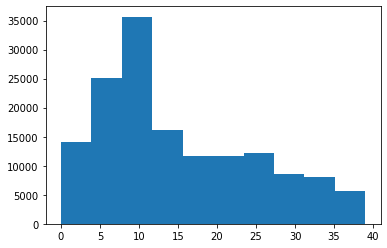

In [593]:
plt.hist(D_vec)

In [594]:
import random

In [682]:
cent = random.sample(range(0,39),4)

In [683]:
cent

[23, 12, 33, 37]

In [684]:
cent = np.array(cent)

In [685]:
cent

array([23, 12, 33, 37])

In [686]:
def dist(p1,p2):
    return(np.abs(p1 - p2))

In [687]:
def assign_cent(cents,dvec):
    assigned_cent = []
    for i in dvec:
        distance = []
        for j in cents:
            distance.append(dist(i,j))
        assigned_cent.append(np.argmin(distance))
    return assigned_cent

In [688]:
get_cent_pos = assign_cent(cent,D_vec)
get_cent_pos

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 0,
 0,
 3,
 2,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,


In [689]:
def mod_cents(clust,dvec):
    new_cents = []
    df = pd.concat([pd.DataFrame(dvec), pd.DataFrame(clust, columns=['cluster'])],
                      axis=1)
    for c in set(df['cluster']):
        current_clust = df[df['cluster'] == c]
        clust_mean = current_clust.mean(axis=0)
        new_cents.append(clust_mean)
    return new_cents

In [690]:
cent = mod_cents(get_cent_pos,D_vec)

In [691]:
cent

[0          22.942962
 cluster     0.000000
 dtype: float64,
 0          8.368996
 cluster    1.000000
 dtype: float64,
 0          31.851559
 cluster     2.000000
 dtype: float64,
 0          37.476644
 cluster     3.000000
 dtype: float64]

In [692]:
cent = np.array(cent)

In [693]:
cent

array([[22.94296202,  0.        ],
       [ 8.3689961 ,  1.        ],
       [31.8515587 ,  2.        ],
       [37.47664391,  3.        ]])

In [694]:
cent = cent[:,0]

In [695]:
prev_cent = cent

In [696]:
for i in range(10):
    get_cent_pos = assign_cent(cent, D_vec)
    cent = mod_cents(get_cent_pos, D_vec)
    cent = np.array(cent)
    cent = cent[:,0]
    print(cent - prev_cent)
    prev_cent = cent

[-1.45421613 -0.56362594 -0.88031828 -0.55512175]
[-1.09638542 -0.36952904 -0.92223097 -0.56366414]
[-1.02705119 -0.30251665 -0.61420058  0.        ]
[-0.57063398  0.         -1.21336496 -0.67054372]
[-1.12764099 -0.27370443 -1.17556036 -0.66725679]
[-0.56381354  0.         -0.56896815  0.        ]
[-1.10113352 -0.2862826  -0.9711618  -0.57817356]
[-0.43341531  0.         -0.83098754 -0.51077819]
[0. 0. 0. 0.]
[0. 0. 0. 0.]


In [697]:
cent

array([15.56867193,  6.57333743, 24.67476606, 33.93110577])

In [698]:
get_cent_pos = assign_cent(cent, D_vec)

In [702]:
len(get_cent_pos)

148590

In [703]:
D_vec.size

148590

In [706]:
for i in range(D_vec.size):
    D_vec[i] = cent[get_cent_pos[i]]

In [707]:
D_vec

array([ 6.57333743,  6.57333743,  6.57333743, ..., 24.67476606,
       33.93110577, 33.93110577])

In [709]:
D_new = np.random.rand(381,390)

In [711]:
k = 0
for i in range(390):
    D_new[:,i] = D_vec[k:k+381]
    k = k + 381

In [712]:
D_new

array([[ 6.57333743,  6.57333743,  6.57333743, ...,  6.57333743,
        15.56867193,  6.57333743],
       [ 6.57333743,  6.57333743,  6.57333743, ..., 24.67476606,
         6.57333743,  6.57333743],
       [ 6.57333743,  6.57333743,  6.57333743, ..., 33.93110577,
        24.67476606,  6.57333743],
       ...,
       [15.56867193, 24.67476606, 15.56867193, ..., 33.93110577,
        33.93110577, 24.67476606],
       [33.93110577, 33.93110577, 15.56867193, ..., 33.93110577,
        33.93110577, 33.93110577],
       [24.67476606, 24.67476606, 24.67476606, ..., 24.67476606,
        33.93110577, 33.93110577]])

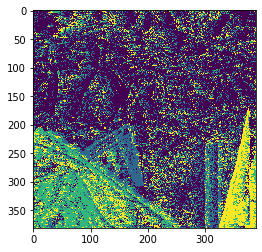

In [713]:
plt.imshow(D_new)